# Example codes for QCL regression
- Quick use

In [4]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'


#import sys
#sys.path.append("regressions")
#from qcl.testing.OneDimDataset import prepare_dataset,eval
from QCLRegressor.testing.OneDimDataset import prepare_dataset,eval
from qclregressor

SyntaxError: invalid syntax (1145355109.py, line 14)

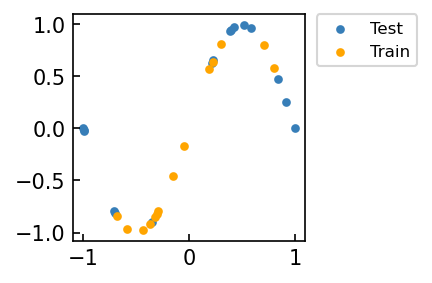

In [19]:
#prepare dataset
n=30
mode="sin"
tr_X,tr_y,te_inner_X,te_inner_y,te_low_X,te_low_y,te_high_X,te_high_y,act_X,act_y=prepare_dataset(n_all_record=n,mode=mode,plot=True)

In [20]:
#regression
from qcl.regressors.StandardQCLRegressor import StandardQCLRegressor
model=StandardQCLRegressor(n_qubit=2,x_dim=1)

model.fit(tr_X,tr_y)
model.predict(tr_X)


loss 0.037502018361235


array([-0.13391271, -0.61402847, -1.17250989,  0.34169722, -0.64661564,
       -0.67407476,  0.51914264, -1.07673164,  0.81643518, -0.76052223,
       -0.86884158, -0.3368781 ,  0.83504248,  0.39270862])

[0.03750201836123538,
 0.07978037837500696,
 1.4844682323908094,
 0.266552098033948]

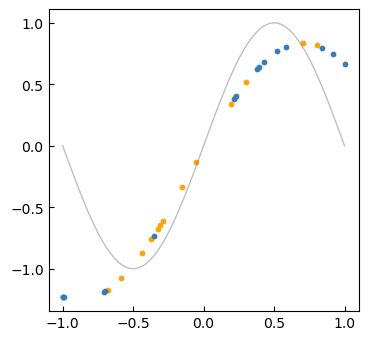

In [21]:
# show results
fig = plt.figure(figsize=(4,4),dpi=100)
ax = fig.add_subplot(1, 1, 1)
eval(ax,model,tr_X,tr_y,te_inner_X,te_inner_y,te_low_X,te_low_y,te_high_X,te_high_y,act_X,act_y)

In [27]:
# draw circuits (entanglement part)
from qulacsvis import circuit_drawer
circuit_drawer(model.vqe_gates.circuit)

           ___     ___     ___             ___     ___     ___   
          |pRX|   |pRY|   |pRX|           |pRX|   |pRY|   |pRX|  
----●-----|   |---|   |---|   |-----●-----|   |---|   |---|   |--
    |     |___|   |___|   |___|     |     |___|   |___|   |___|  
   _|_     ___     ___     ___     _|_                           
  |CX |   |pRX|   |pRY|   |pRX|   |CX |                          
--|   |---|   |---|   |---|   |---|   |--------------------------
  |___|   |___|   |___|   |___|   |___|                          


loss 0.004279264498464


[0.004279264498463918,
 0.00989505811915981,
 0.2474229132233168,
 0.050595851127349274]

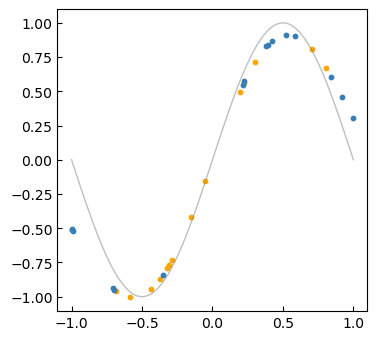

In [32]:
#change circuit configuration
from qcl.gates.CNOTRotationGates import CNOTRotationGates
from qcl.Encoders.XYEncoder import XYEncoder
from qcl.Encoders.prerocess import *

# XY encoder, entanglement with 3 depth
model=StandardQCLRegressor(x_dim=1,n_qubit=2,encoder=XYEncoder(2),vqe_gates=CNOTRotationGates(n_qubit=2,depth=3))
model.fit(tr_X,tr_y)
fig = plt.figure(figsize=(4,4),dpi=100)
ax = fig.add_subplot(1, 1, 1)
eval(ax,model,tr_X,tr_y,te_inner_X,te_inner_y,te_low_X,te_low_y,te_high_X,te_high_y,act_X,act_y)

loss 0.001075232473457


[0.0010752324734570403,
 0.0012066412317174753,
 0.06931497654221853,
 0.03729592785473822]

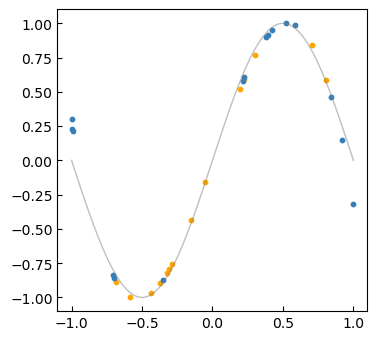

In [33]:
# XY encoder with arccos and arcsin, entanglement with 3 depth
model=StandardQCLRegressor(x_dim=1,n_qubit=2,encoder=XYEncoder(2,preprocess_func=two_arc_angles),vqe_gates=CNOTRotationGates(n_qubit=2,depth=3))
model.fit(tr_X,tr_y)
fig = plt.figure(figsize=(4,4),dpi=100)
ax = fig.add_subplot(1, 1, 1)
eval(ax,model,tr_X,tr_y,te_inner_X,te_inner_y,te_low_X,te_low_y,te_high_X,te_high_y,act_X,act_y)

loss 0.000000474619487


[4.7461948710684144e-07,
 9.886101235067179e-06,
 0.007826038513837646,
 0.000563089673728481]

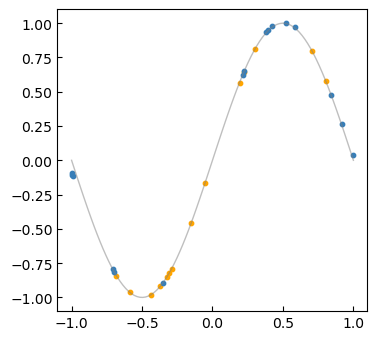

In [34]:

#change circuit configuration
from qcl.gates.CNOTRotationGates import CNOTRotationGates
from qcl.Encoders.XYEncoder import XYEncoder
from qcl.Encoders.prerocess import *

# XY encoder, entanglement with 3 depth. 4 qubits
model=StandardQCLRegressor(x_dim=1,n_qubit=4,encoder=XYEncoder(4),vqe_gates=CNOTRotationGates(n_qubit=4,depth=3))
model.fit(tr_X,tr_y)
fig = plt.figure(figsize=(4,4),dpi=100)
ax = fig.add_subplot(1, 1, 1)
eval(ax,model,tr_X,tr_y,te_inner_X,te_inner_y,te_low_X,te_low_y,te_high_X,te_high_y,act_X,act_y)